In [1]:
# Manipulação dos dados

import pandas as pd 
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np


# Visualização
import matplotlib.pyplot as plt


# Bibliotecas para o Pipeline e GridSearch
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Modelo a ser usado
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier



# Métricas
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc

# Salvar pkl
import joblib
import pickle

### Tabela de Modelagem

In [2]:
abt = pd.read_csv("outputs/abt.csv")

### Tabela de Metadados

In [3]:
metadados = pd.read_csv("outputs/metadados.csv")

### Variáveis Numéricas

In [4]:
# Filtrando Data Frame 
vars_numericas_df = metadados[((metadados.Level  == 'ordinal')|(metadados.Level == 'interval')) & (metadados.Role == 'input')]
# Selecionando nomes das variáveis a partir do data frame filtrado
vars_numericas_df.head()
 

,Unnamed: 0,Features,Role,Level,Keep,Tipo,Cardinality
2,2,TransactionDT,input,ordinal,True,int64,573349
3,3,TransactionAmt,input,interval,True,float64,20902
5,5,card1,input,ordinal,True,int64,13553
6,6,card2,input,interval,True,float64,500
7,7,card3,input,interval,True,float64,114


In [5]:
# Selecionando nomes das variáveis a partir do data frame filtrado
lista_vars_numericas = list(vars_numericas_df['Features'])
lista_vars_numericas

['TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85'

In [6]:
# Salvar a lista em um arquivo
with open('outputs/lista_vars_numericas.pkl', 'wb') as arquivo:
    pickle.dump(lista_vars_numericas, arquivo)

### Variáveis Categóricas de Baixa Cardinalidade

In [7]:
# Filtrando Data Frame 
vars_to_dummif_df = metadados[(metadados.Level  == 'nominal') & (metadados.Role == 'input')& (metadados.Cardinality <= 10)]
# Selecionando nomes das variáveis a partir do data frame filtrado
vars_to_dummif_df

,Unnamed: 0,Features,Role,Level,Keep,Tipo,Cardinality
4,4,ProductCD,input,nominal,True,object,5
8,8,card4,input,nominal,True,object,4
10,10,card6,input,nominal,True,object,4
46,46,M1,input,nominal,True,object,2
47,47,M2,input,nominal,True,object,2
48,48,M3,input,nominal,True,object,2
49,49,M4,input,nominal,True,object,3
50,50,M5,input,nominal,True,object,2
51,51,M6,input,nominal,True,object,2
52,52,M7,input,nominal,True,object,2


In [8]:
# Selecionando nomes das variáveis a partir do data frame filtrado
lista_vars_dummif = list(vars_to_dummif_df['Features'])
lista_vars_dummif

['ProductCD',
 'card4',
 'card6',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_12',
 'id_15',
 'id_16',
 'id_23',
 'id_27',
 'id_28',
 'id_29',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType']

In [9]:
# Salvar a lista em um arquivo
with open('outputs/lista_vars_dummif.pkl', 'wb') as arquivo:
    pickle.dump(lista_vars_dummif, arquivo)



### Variáveis Categóricas de Alta Cardinalidade

In [10]:
# Filtrando Data Frame 
vars_to_le_df = metadados[(metadados.Level  == 'nominal') & 
                          (metadados.Role == 'input') & 
                          (metadados.Cardinality > 10)]

# Selecionando nomes das variáveis a partir do data frame filtrado
vars_to_le_df

,Unnamed: 0,Features,Role,Level,Keep,Tipo,Cardinality
15,15,P_emaildomain,input,nominal,True,object,59
16,16,R_emaildomain,input,nominal,True,object,60
423,423,id_30,input,nominal,True,object,75
424,424,id_31,input,nominal,True,object,130
426,426,id_33,input,nominal,True,object,260
433,433,DeviceInfo,input,nominal,True,object,1786


In [11]:
# Selecionando nomes das variáveis a partir do data frame filtrado
lista_vars_le = list(vars_to_le_df['Features'])
lista_vars_le

['P_emaildomain', 'R_emaildomain', 'id_30', 'id_31', 'id_33', 'DeviceInfo']

In [12]:
# Salvar a lista em um arquivo
with open('outputs/lista_vars_le.pkl', 'wb') as arquivo:
    pickle.dump(lista_vars_le, arquivo)



### Separar base para teste (20%)

In [13]:
split = StratifiedShuffleSplit(test_size=0.2)
for x, y in split.split(abt, abt['isFraud']):
    df00 = abt.iloc[x]
    df00_unseen = abt.iloc[y]
    
print('Dados pra treinamento:' + str(df00.shape))
print('Dados pra teste:' + str(df00_unseen.shape))

Dados pra treinamento:(472432, 435)
Dados pra teste:(118108, 435)


In [14]:
# Salvar a lista em um arquivo
with open('outputs/df00.pkl', 'wb') as arquivo:
    pickle.dump(df00, arquivo)

with open('outputs/df00_unseen.pkl', 'wb') as arquivo:
    pickle.dump(df00_unseen, arquivo)

### Separando Variáveis explicativas e Alvo

In [15]:
X = df00.drop(['isFraud'], axis=1) # Variáveis Explicativas
y = df00["isFraud"] # Variável Dependente

#### Separar as bases em Treino e Validação

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Pipeline - Treinamento

##### Transformador das variáveis numéricas

In [17]:
num_transformer = Pipeline(steps=[
    ('num_null', SimpleImputer(missing_values=pd.NA, strategy='mean')),
    ('normalize', StandardScaler())
])

##### Transformador das Variáveis dummy

In [18]:
ohc_transformer = Pipeline(steps=[
    #('char_null', SimpleImputer(strategy='most_frequent') ),
    ('char_null', SimpleImputer(missing_values=pd.NA, strategy='most_frequent') ),
    ('one-hot encoder', OneHotEncoder(drop_invariant='first'))    ,
])

#### Compondo os pré-processadores

In [19]:
preprocessador1 = ColumnTransformer(transformers=[
    ('num', num_transformer, lista_vars_numericas),
    ('ohe', ohc_transformer, lista_vars_dummif)
])

In [20]:
X_train_transformado = preprocessador1.fit_transform(x_train)
X_valid_transformado = preprocessador1.transform(x_valid)
X_valid_transformado

array([[ 0.34203114,  2.38956939, -1.35179674, ...,  0.        ,
         1.        ,  0.        ],
       [-0.83396977,  0.06173597,  0.08321816, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.61635063, -0.04060485,  1.19721068, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 1.595824  ,  0.02502453, -1.44847057, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.10947769, -0.34824262,  0.66040579, ...,  1.        ,
         1.        ,  0.        ],
       [-0.87107507, -0.49259446,  1.2708378 , ...,  0.        ,
         1.        ,  0.        ]])

In [21]:
# Salvar Preprocessador em um arquivo pkl
with open('outputs/preprocessador.pkl', 'wb') as arquivo:
    pickle.dump(preprocessador1, arquivo)

In [22]:
# Obter os nomes das variáveis transformadas após aplicar o ColumnTransformer para o transformador numérico
nomes_das_variaveis_numericas_transformadas = preprocessador1.named_transformers_['num'].named_steps['normalize'].get_feature_names_out(input_features=lista_vars_numericas)

# Obter os nomes das variáveis transformadas após aplicar o ColumnTransformer para o transformador one-hot
nomes_das_variaveis_one_hot_transformadas = preprocessador1.named_transformers_['ohe'].named_steps['one-hot encoder'].get_feature_names_out(input_features=lista_vars_dummif)

# Concatenar os nomes das colunas transformadas
nomes_das_variaveis_transformadas = nomes_das_variaveis_numericas_transformadas.tolist() + nomes_das_variaveis_one_hot_transformadas.tolist()

# Atribuir os nomes das variáveis transformadas às colunas do DataFrame
X_train_transformado_df = pd.DataFrame(X_train_transformado, columns=nomes_das_variaveis_transformadas)

X_valid_transformado_df =  pd.DataFrame(X_valid_transformado, columns=nomes_das_variaveis_transformadas)

X_train_transformado_df



,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,20_1,20_2,21_1,21_2,22_1,22_2,23_1,23_2,24_1,24_2
0,-0.755194,0.595180,0.031006,-8.776075e-01,-2.840430e-01,6.016693e-01,-1.748010e+00,7.874346e-02,-0.492953,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.665181,1.255535,-1.634068,9.666711e-01,-2.840430e-01,6.016693e-01,3.575003e-01,7.874346e-02,0.000000,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.834193,-0.155456,-0.405046,-1.075437e+00,-2.840430e-01,-8.094235e-01,3.575003e-01,7.874346e-02,-0.476132,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-1.017060,-0.527985,-1.110316,7.963054e-02,2.804093e+00,6.016693e-01,-5.924970e-16,1.121214e-14,0.000000,0.000000,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.096882,-0.483985,1.219646,1.164500e+00,2.804093e+00,-1.490641e+00,-5.924970e-16,1.121214e-14,0.000000,-1.302185,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330697,-0.387513,0.307846,1.016100,-1.605108e+00,-2.840430e-01,6.016693e-01,-1.143457e+00,7.874346e-02,-0.492953,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
330698,0.203261,-0.258002,-0.416875,8.390394e-01,-2.840430e-01,6.503276e-01,2.532672e-01,7.874346e-02,0.000000,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
330699,-0.029569,-0.073420,1.052608,-1.228595e+00,-2.840430e-01,-2.366491e+00,-1.949355e-01,7.874346e-02,-0.484542,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
330700,0.103168,0.726234,0.263921,-7.255024e-16,2.507717e-15,1.382954e-15,1.431102e+00,7.874346e-02,0.000000,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Ranking com as melhores Variáveis do Modelo

In [25]:
model_importance = CatBoostClassifier(random_state=10)
model_importance.fit(X_train_transformado_df, y_train)


# Obtenha a importância das características
importancias = model_importance.feature_importances_

# Crie um DataFrame para exibir o ranking das variáveis mais importantes
ranking = pd.DataFrame({'Variavel': nomes_das_variaveis_transformadas, 'Importancia': importancias})
ranking = ranking.sort_values(by='Importancia', ascending=False)

# Exiba o ranking
display(ranking)

Learning rate set to 0.122669
0:	learn: 0.5147588	total: 294ms	remaining: 4m 53s
1:	learn: 0.3893982	total: 391ms	remaining: 3m 15s
2:	learn: 0.3017709	total: 494ms	remaining: 2m 44s
3:	learn: 0.2456255	total: 613ms	remaining: 2m 32s
4:	learn: 0.2072421	total: 715ms	remaining: 2m 22s
5:	learn: 0.1793904	total: 837ms	remaining: 2m 18s
6:	learn: 0.1589730	total: 962ms	remaining: 2m 16s
7:	learn: 0.1463952	total: 1.07s	remaining: 2m 13s
8:	learn: 0.1374058	total: 1.18s	remaining: 2m 10s
9:	learn: 0.1302870	total: 1.31s	remaining: 2m 9s
10:	learn: 0.1245679	total: 1.44s	remaining: 2m 9s
11:	learn: 0.1203022	total: 1.6s	remaining: 2m 11s
12:	learn: 0.1173556	total: 1.74s	remaining: 2m 11s
13:	learn: 0.1147018	total: 1.89s	remaining: 2m 12s
14:	learn: 0.1117157	total: 2.04s	remaining: 2m 14s
15:	learn: 0.1100376	total: 2.17s	remaining: 2m 13s
16:	learn: 0.1089013	total: 2.3s	remaining: 2m 13s
17:	learn: 0.1080011	total: 2.44s	remaining: 2m 13s
18:	learn: 0.1070501	total: 2.59s	remaining: 2m 

,Variavel,Importancia
22,C13,3.910450
2,card1,3.704198
0,TransactionDT,3.672218
3,card2,3.477747
23,C14,3.301106
...,...,...
279,V241,0.000000
273,V235,0.000000
266,V228,0.000000
263,V225,0.000000


### Retirar variáveis com baixa importância

In [26]:
lista_importancia = ranking[ranking.Importancia > 0.01].Variavel.to_list()
lista_importancia
X_train_transformado_df = X_train_transformado_df[lista_importancia]
X_train_transformado_df

,C13,card1,TransactionDT,card2,C14,TransactionAmt,C1,addr1,card5,card3,...,V98,V193,V253,V21,V333,V238,V105,D7,V144,V300
0,-0.244396,0.031006,-0.755194,-8.776075e-01,-0.147616,0.595180,-0.098279,-1.748010e+00,6.016693e-01,-2.840430e-01,...,-0.217521,0.000000,2.472956e-16,-0.410580,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
1,-0.252116,-1.634068,0.665181,9.666711e-01,-0.167830,1.255535,-0.098279,3.575003e-01,6.016693e-01,-2.840430e-01,...,-0.217521,0.000000,2.472956e-16,-0.410580,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
2,-0.205797,-0.405046,0.834193,-1.075437e+00,-0.147616,-0.155456,-0.098279,3.575003e-01,-8.094235e-01,-2.840430e-01,...,-0.217521,0.000000,2.472956e-16,-0.410580,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
3,-0.244396,-1.110316,-1.017060,7.963054e-02,-0.147616,-0.527985,-0.098279,-5.924970e-16,6.016693e-01,2.804093e+00,...,-0.217521,-0.181058,-9.717319e-02,2.744475,-1.149995e-16,-0.455396,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
4,-0.252116,1.219646,1.096882,1.164500e+00,-0.167830,-0.483985,-0.098279,-5.924970e-16,-1.490641e+00,2.804093e+00,...,-0.217521,-0.181058,-9.717319e-02,2.744475,-1.149995e-16,3.066266,0.212828,-1.637784e+00,-2.276663e-16,-0.155899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330697,2.588800,1.016100,-0.387513,-1.605108e+00,1.489692,0.307846,0.637311,-1.143457e+00,6.016693e-01,-2.840430e-01,...,-0.217521,0.000000,2.472956e-16,-0.410580,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
330698,-0.252116,-0.416875,0.203261,8.390394e-01,-0.167830,-0.258002,-0.098279,2.532672e-01,6.503276e-01,-2.840430e-01,...,-0.217521,0.000000,2.472956e-16,-0.410580,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
330699,-0.244396,1.052608,-0.029569,-1.228595e+00,-0.147616,-0.073420,-0.098279,-1.949355e-01,-2.366491e+00,-2.840430e-01,...,-0.217521,0.000000,2.472956e-16,-0.410580,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
330700,0.658830,0.263921,0.103168,-7.255024e-16,0.297085,0.726234,0.096877,1.431102e+00,1.382954e-15,2.507717e-15,...,-0.217521,0.000000,2.472956e-16,-0.410580,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899


In [27]:
X_valid_transformado_df= X_valid_transformado_df[lista_importancia]
X_valid_transformado_df

,C13,card1,TransactionDT,card2,C14,TransactionAmt,C1,addr1,card5,card3,...,V98,V193,V253,V21,V333,V238,V105,D7,V144,V300
0,-0.151758,-1.351797,0.342031,-1.605108,-0.107189,2.389569,-0.083267,-6.222915e-01,0.650328,-0.284043,...,-0.217521,0.000000,2.472956e-16,-4.105797e-01,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
1,0.002640,0.083218,-0.833970,-0.667015,-0.147616,0.061736,-0.098279,1.858458e+00,0.650328,-0.284043,...,-0.217521,0.000000,2.472956e-16,-4.105797e-01,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
2,0.218797,1.197211,1.616351,0.756079,-0.066761,-0.040605,-0.068255,4.096169e-01,-2.366491,-0.284043,...,6.743042,-0.181058,2.472956e-16,2.744475e+00,1.619454e+01,-0.455396,22.715947,-1.637784e+00,1.867216e+00,-0.155899
3,-0.244396,-1.240846,-0.849178,-1.605108,-0.147616,2.459506,-0.098279,8.649407e-02,0.480023,-0.284043,...,-0.217521,0.000000,2.472956e-16,-4.105797e-01,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
4,4.117337,-0.760944,1.115085,0.813513,1.530120,-0.175965,0.569757,-8.932978e-01,0.650328,-0.284043,...,-0.217521,0.000000,2.472956e-16,-4.105797e-01,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141725,-0.151758,0.826220,0.745036,-1.081818,-0.147616,0.931325,-0.098279,3.783470e-01,0.650328,-0.284043,...,-0.217521,0.000000,2.472956e-16,-4.105797e-01,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
141726,-0.228957,-1.532295,-0.101197,-0.016093,-0.127402,-0.073420,-0.090773,-2.783220e-01,-1.782591,-0.284043,...,-0.217521,0.000000,2.472956e-16,-4.105797e-01,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
141727,-0.228957,-1.448471,1.595824,-1.675306,-0.147616,0.025025,-0.090773,-1.949355e-01,0.650328,-0.284043,...,-0.217521,0.000000,2.472956e-16,-4.105797e-01,-1.149995e-16,0.000000,-0.083266,-2.748966e-16,-2.276663e-16,-0.155899
141728,-0.244396,0.660406,1.109478,-1.228595,-0.147616,-0.348243,-0.098279,4.096169e-01,-2.366491,-0.284043,...,-0.217521,-0.181058,-9.717319e-02,-8.757035e-17,-3.435588e-01,-0.455396,-0.083266,-2.748966e-16,-9.524082e-01,-0.155899


### Pipeline pra gerar os modelos

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from scipy.stats import ks_2samp



classificadores = []

classifiers = [
LogisticRegression(random_state=10),
RandomForestClassifier(random_state=10),
CatBoostClassifier(random_state=10),
XGBClassifier(random_state=10),
LGBMClassifier(random_state=10)]

name_class = [
'Regressão Logística',
'Random Forest',
'CATBoost',
'XGB',
'LightGBM'
]

name_class = pd.DataFrame(name_class, columns=['NOME'])


for clf in classifiers:
    model = Pipeline([
        ("classifiers",clf)])
    classificador = clf
    fitter = model.fit(X_train_transformado_df, y_train)
    train_score = model.score(X_train_transformado_df, y_train)
    test_score = model.score(X_valid_transformado_df, y_valid)
    y_pred_train = model.predict(X_train_transformado_df)
    y_score_train = model.predict_proba(X_train_transformado_df)
    y_pred_valid = model.predict(X_valid_transformado_df)
    y_score_valid = model.predict_proba(X_valid_transformado_df)
    acuracia_train = round(accuracy_score(y_pred_train, y_train) * 100, 2)
    acuracia_valid = round(accuracy_score(y_pred_valid, y_valid) * 100, 2)
    fpr_train, tpr_train, thresholds = roc_curve(y_train, y_score_train[:,1])
    roc_auc_train = 100*round(auc(fpr_train, tpr_train), 2)
    gini_train = 100*round((2*roc_auc_train/100 - 1), 2)
    fpr_valid, tpr_valid, thresholds = roc_curve(y_valid, y_score_valid[:,1])
    roc_auc_valid = 100*round(auc(fpr_valid, tpr_valid), 2)
    gini_valid = 100*round((2*roc_auc_valid/100 - 1), 2)
    train_ks = 100*round(max(tpr_train - fpr_train), 2)
    test_ks = 100*round(max(tpr_valid - fpr_valid), 2)

    
    
    
    classificadores.append([acuracia_train, acuracia_valid,roc_auc_train,
    roc_auc_valid, gini_train, gini_valid, train_ks, test_ks])
    

c:\Users\kleub\Documents\Projetos_Git\fraude_cartoes\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.122669
0:	learn: 0.5099590	total: 103ms	remaining: 1m 42s
1:	learn: 0.3843447	total: 191ms	remaining: 1m 35s
2:	learn: 0.3002552	total: 305ms	remaining: 1m 41s
3:	learn: 0.2457912	total: 397ms	remaining: 1m 38s
4:	learn: 0.2057725	total: 512ms	remaining: 1m 41s
5:	learn: 0.1790685	total: 620ms	remaining: 1m 42s
6:	learn: 0.1602804	total: 719ms	remaining: 1m 41s
7:	learn: 0.1461919	total: 825ms	remaining: 1m 42s
8:	learn: 0.1365399	total: 933ms	remaining: 1m 42s
9:	learn: 0.1298073	total: 1.04s	remaining: 1m 42s
10:	learn: 0.1243945	total: 1.14s	remaining: 1m 42s
11:	learn: 0.1198787	total: 1.27s	remaining: 1m 44s
12:	learn: 0.1164318	total: 1.37s	remaining: 1m 43s
13:	learn: 0.1140923	total: 1.47s	remaining: 1m 43s
14:	learn: 0.1120622	total: 1.58s	remaining: 1m 44s
15:	learn: 0.1103768	total: 1.69s	remaining: 1m 43s
16:	learn: 0.1092500	total: 1.78s	remaining: 1m 43s
17:	learn: 0.1082265	total: 1.88s	remaining: 1m 42s
18:	learn: 0.1069631	total: 2s	remaining: 1m

### Comparar modelos

In [31]:
pd.set_option('display.max_colwidth', None)
classificadores = pd.DataFrame(classificadores, 
                               columns=['ACCURACY_TRAIN', 'ACCURACY_VALID',
                                        'ROC_AUC_TRAIN', 'ROC_AUC_VALID',
                                        'GINI_TRAIN', 'GINI_VALID', 'KS_TRAIN', 'KS_VALID'])

preditores = pd.merge(name_class,classificadores, left_index=True, right_index=True)

preditores['DELTA_AUC'] = preditores['ROC_AUC_TRAIN'] - preditores['ROC_AUC_VALID']
preditores['DELTA_GINI'] = preditores['GINI_TRAIN'] - preditores['GINI_VALID']
preditores['DELTA_KS'] = preditores['KS_TRAIN'] - preditores['KS_VALID']



display(preditores.sort_values(by='DELTA_AUC', ascending=True))

,NOME,ACCURACY_TRAIN,ACCURACY_VALID,ROC_AUC_TRAIN,ROC_AUC_VALID,GINI_TRAIN,GINI_VALID,KS_TRAIN,KS_VALID,DELTA_AUC,DELTA_GINI,DELTA_KS
0,Regressão Logística,97.19,97.14,85.0,86.0,70.0,72.0,55.0,56.0,-1.0,-2.0,-1.0
4,LightGBM,97.96,97.78,94.0,93.0,88.0,86.0,75.0,73.0,1.0,2.0,2.0
2,CATBoost,98.47,98.07,95.0,93.0,90.0,86.0,77.0,73.0,2.0,4.0,4.0
3,XGB,98.35,98.00,96.0,94.0,92.0,88.0,79.0,73.0,2.0,4.0,6.0
1,Random Forest,100.00,97.90,100.0,92.0,100.0,84.0,100.0,73.0,8.0,16.0,27.0


##### *Analisando as métricas de avaliação, mas especificamente nos valores "DELTA", os modelos que se ajustaram melhor aos dados de validação foram os modelos de CATBoost, LightGBM e Regressão Logística.*

### Modelo Selecionado

In [176]:
modelo = CatBoostClassifier(random_state=10)

modelo.fit(X_train_transformado_df, y_train)

Learning rate set to 0.122669
0:	learn: 0.5099590	total: 138ms	remaining: 2m 17s
1:	learn: 0.3843447	total: 243ms	remaining: 2m 1s
2:	learn: 0.3002552	total: 374ms	remaining: 2m 4s
3:	learn: 0.2457912	total: 538ms	remaining: 2m 14s
4:	learn: 0.2057725	total: 698ms	remaining: 2m 18s
5:	learn: 0.1790685	total: 842ms	remaining: 2m 19s
6:	learn: 0.1602804	total: 975ms	remaining: 2m 18s
7:	learn: 0.1461919	total: 1.12s	remaining: 2m 18s
8:	learn: 0.1365399	total: 1.28s	remaining: 2m 21s
9:	learn: 0.1298073	total: 1.43s	remaining: 2m 21s
10:	learn: 0.1243945	total: 1.61s	remaining: 2m 24s
11:	learn: 0.1198787	total: 1.8s	remaining: 2m 28s
12:	learn: 0.1164318	total: 1.96s	remaining: 2m 28s
13:	learn: 0.1140923	total: 2.14s	remaining: 2m 30s
14:	learn: 0.1120622	total: 2.3s	remaining: 2m 31s
15:	learn: 0.1103768	total: 2.44s	remaining: 2m 29s
16:	learn: 0.1092500	total: 2.56s	remaining: 2m 28s
17:	learn: 0.1082265	total: 2.68s	remaining: 2m 26s
18:	learn: 0.1069631	total: 2.84s	remaining: 2m 

In [177]:
# Visualizando algumas Métricas

train_score = modelo.score(X_train_transformado_df, y_train)
y_pred_train = modelo.predict(X_train_transformado_df)
y_score_train = modelo.predict_proba(X_train_transformado_df)
acuracia_train = round(accuracy_score(y_pred_train, y_train) * 100, 5)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_score_train[:,1])
roc_auc_train = 100*round(auc(fpr_train, tpr_train), 5)
gini_train = 100*round((2*roc_auc_train/100 - 1), 5)
train_ks = 100*round(max(tpr_train - fpr_train), 5)


valid_score = modelo.score(X_valid_transformado_df, y_valid)
y_pred_valid = modelo.predict(X_valid_transformado_df)
y_score_valid = modelo.predict_proba(X_valid_transformado_df)
acuracia_valid = round(accuracy_score(y_pred_valid, y_valid) * 100, 5)
fpr_valid, tpr_valid, thresholds = roc_curve(y_valid, y_score_valid[:,1])
roc_auc_valid = 100*round(auc(fpr_valid, tpr_valid), 5)
gini_valid = 100*round((2*roc_auc_valid/100 - 1), 5)
valid_ks = 100*round(max(tpr_valid - fpr_valid), 5)

print("Acurácia da base de Treino:", acuracia_train)
print("Acurácia da base de Validação:", acuracia_valid)
print("Área da Curva ROC da base de Treino", roc_auc_train)
print("Área da Curva ROC da base de Validação", roc_auc_valid)
print("Gini da base de Treino", gini_train)
print("Gini da base de Validação", gini_valid)
print("KS da base de Treino", train_ks)
print("KS da base de Validação", valid_ks)

Acurácia da base de Treino: 98.46932
Acurácia da base de Validação: 98.07098
Área da Curva ROC da base de Treino 94.99300000000001
Área da Curva ROC da base de Validação 93.447
Gini da base de Treino 89.986
Gini da base de Validação 86.894
KS da base de Treino 77.178
KS da base de Validação 73.187


In [178]:
# Salve o modelo em um arquivo .pkl
joblib.dump(modelo, 'outputs/modelo.pkl')

['outputs/modelo.pkl']

## Dados de Teste

In [179]:
# Variáveis Explicativas e Variável Dependente

X_test = df00_unseen.drop(['isFraud'], axis=1)
y_test = df00_unseen["isFraud"]

# Pipeline do Dataprep - Teste

In [180]:
# Carregando o pipeline salvo anteriormente
modelo_carregado = joblib.load('outputs/modelo.pkl')

In [181]:
X_test_transformado = preprocessador1.transform(X_test)
X_test_transformado = pd.DataFrame(X_test_transformado, columns=nomes_das_variaveis_transformadas)
X_test_transformado = X_test_transformado[lista_importancia]

In [182]:
# Faça previsões nos novos dados usando o pipeline
previsoes = modelo_carregado.predict(X_test_transformado)
len(previsoes)

118108

In [183]:
# Algumas Métricas

from sklearn.metrics import classification_report

report = classification_report(y_test, previsoes)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.94      0.50      0.65      4133

    accuracy                           0.98    118108
   macro avg       0.96      0.75      0.82    118108
weighted avg       0.98      0.98      0.98    118108



In [184]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, previsoes)

array([[113845,    130],
       [  2078,   2055]], dtype=int64)

In [185]:
# Visualizando algumas Métricas

test_score = modelo_carregado.score(X_test_transformado, y_test)
y_pred_test = modelo_carregado.predict(X_test_transformado)
y_score_test = modelo_carregado.predict_proba(X_test_transformado)
acuracia_test = round(accuracy_score(y_pred_test, y_test) * 100, 5)
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_score_test[:,1])
roc_auc_test = 100*round(auc(fpr_test, tpr_test), 5)
gini_test = 100*round((2*roc_auc_test/100 - 1), 5)
test_ks = 100*round(max(tpr_test - fpr_test), 5)

print("Acurácia da base de Teste:", acuracia_test)
print("Área da Curva ROC da base de Teste", roc_auc_test)
print("Gini da base de Teste", gini_test)
print("KS da base de Teste", test_ks)

Acurácia da base de Teste: 98.13052
Área da Curva ROC da base de Teste 93.27
Gini da base de Teste 86.53999999999999
KS da base de Teste 73.237


## Gráfico da Curva AUC

C:\Users\kleub\AppData\Local\Temp\ipykernel_18360\1489429468.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


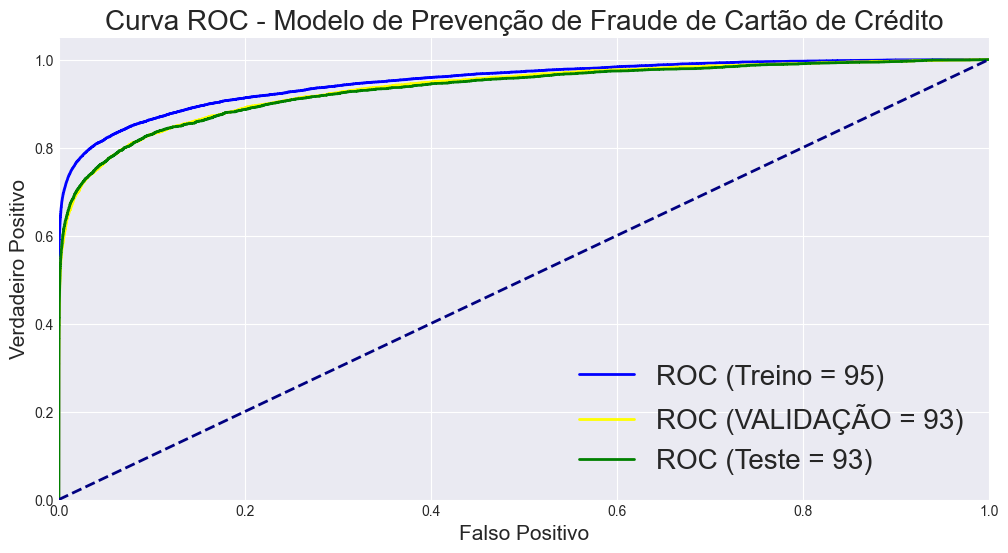

Acurácia - Treino: 98.46932
Acurácia - Validação: 98.07098
Acurácia - Teste: 98.13052
KS - Treino: 77.178
KS - Validação: 73.187
KS - Teste: 73.237
Gini - Treino: 89.986
Gini - Validação: 86.894
Gini - Teste: 86.53999999999999
Área da Curva Roc - Treino: 94.99300000000001
Área da Curva Roc - Validação: 93.447
Área da Curva Roc - Teste: 93.27


In [186]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_train, tpr_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_train)
plt.plot(fpr_valid, tpr_valid, color='yellow',lw=lw, label='ROC (VALIDAÇÃO = %0.0f)' % roc_auc_valid)
plt.plot(fpr_test, tpr_test, color='green',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo de Prevenção de Fraude de Cartão de Crédito', fontsize=20)
plt.show()


print('Acurácia - Treino:', acuracia_train)
print('Acurácia - Validação:', acuracia_valid)
print('Acurácia - Teste:', acuracia_test)
print('KS - Treino:', train_ks)
print('KS - Validação:', valid_ks)
print('KS - Teste:', test_ks)
print('Gini - Treino:', gini_train)
print('Gini - Validação:', gini_valid)
print('Gini - Teste:', gini_test)
print('Área da Curva Roc - Treino:', roc_auc_train)
print('Área da Curva Roc - Validação:', roc_auc_valid)
print('Área da Curva Roc - Teste:', roc_auc_test)

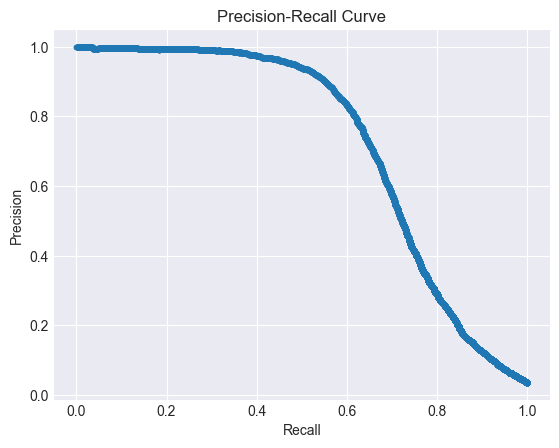

In [187]:
# Calcule os valores de precisão e recall para diferentes limiares de decisão
precision, recall, thresholds = precision_recall_curve(y_test, y_score_test[:,1])

# Plote a curva Precision-Recall
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

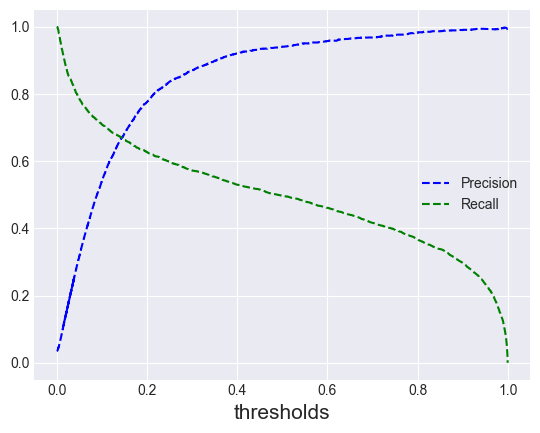

In [188]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_score_test[:,1])

def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel('thresholds', fontsize=15)
    plt.legend(loc="lower right")
    plt.legend(fontsize=10) 

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

In [189]:
from sklearn.metrics import precision_score, recall_score

pr = precision_score(
    y_test,
    y_pred_test,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)

re = recall_score(
    y_test,
    y_pred_test,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)

print(pr, re)

0.9405034324942791 0.49721751754173726


In [218]:
thr_ajusted_precision = thresholds[np.argmax(precision >= 0.74)]
y_score_test_ajusted = (y_score_test[:,1] >= thr_ajusted_precision)
precision_score(y_test, y_score_test_ajusted)

0.7401398601398601

In [219]:
y_test_pred_ajusted = (y_score_test[:,1] >= thr_ajusted_precision)
y_test_pred_ajusted

array([False, False, False, ..., False, False, False])

In [220]:
from sklearn.metrics import precision_score, recall_score

pr = precision_score(
    y_test,
    y_test_pred_ajusted,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)

re = recall_score(
    y_test,
    y_test_pred_ajusted,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)

print(pr, re)

0.7401398601398601 0.6402129203968062


In [221]:
y_test_pred_ajusted = [0 if element == False else 1 for element in y_test_pred_ajusted]

print(y_test_pred_ajusted)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [222]:
confusion_matrix(y_test, y_test_pred_ajusted)

array([[113046,    929],
       [  1487,   2646]], dtype=int64)

In [223]:
report = classification_report(y_test, y_test_pred_ajusted)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    113975
           1       0.74      0.64      0.69      4133

    accuracy                           0.98    118108
   macro avg       0.86      0.82      0.84    118108
weighted avg       0.98      0.98      0.98    118108



In [224]:
# Preparando base com Score
abt_predict = X_test.copy()

abt_predict["Predict"] = y_test_pred_ajusted
abt_predict["isFraud"] = abt["isFraud"]
abt_predict["Score"] = modelo_carregado.predict_proba(X_test_transformado)[:,0]

#xvars = abt_scored.drop('TARGET',axis=1)

abt_predict

,Unnamed: 0,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Predict,isFraud,Score
278998,278998,3265998,6801118,49.000,W,7815,161.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.994321
30761,30761,3017761,767403,59.000,W,1767,543.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.992305
575526,575526,3562526,15287794,54.500,W,9112,250.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.993988
323007,323007,3310007,8013258,59.000,W,2803,100.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.997269
555533,555533,3542533,14679357,117.000,W,8868,205.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.994119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493263,493263,3480263,12866567,39.716,C,10146,580.0,106.0,visa,NaN,...,NaN,F,F,T,F,desktop,PULP 4G Build/LMY47V,0,0,0.991409
153189,153189,3140189,3175966,57.950,W,12577,268.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.997287
58068,58068,3045068,1351109,251.000,W,8695,170.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.986621
282228,282228,3269228,6893446,49.000,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.975546


In [225]:
# Filtrando o DataFrame onde "Predict" é igual a 1
filtered_df = abt_predict[abt_predict['Predict'] == 1]

# Obtendo o valor máximo do campo "Score" no DataFrame filtrado
max_score = filtered_df['Score'].max()

print(max_score)

0.8223399573732866


In [226]:
faixas_cima = abt_predict[(abt_predict.Score  > max_score)]
y_faixas_cima = faixas_cima["isFraud"]
faixas_cima = preprocessador1.transform(faixas_cima)
faixas_cima = pd.DataFrame(faixas_cima, columns=nomes_das_variaveis_transformadas)
faixas_cima = faixas_cima[lista_importancia]


prev_faixas_cima = modelo_carregado.predict(faixas_cima)

# Visualizando Métricas com o novo corte

from sklearn.metrics import classification_report

report = classification_report(y_faixas_cima, prev_faixas_cima)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    113046
           1       0.00      0.00      0.00      1487

    accuracy                           0.99    114533
   macro avg       0.49      0.50      0.50    114533
weighted avg       0.97      0.99      0.98    114533



c:\Users\kleub\Documents\Projetos_Git\fraude_cartoes\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kleub\Documents\Projetos_Git\fraude_cartoes\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kleub\Documents\Projetos_Git\fraude_cartoes\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [227]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix

cm_cima = confusion_matrix(y_faixas_cima, prev_faixas_cima)
cm_cima

array([[113046,      0],
       [  1487,      0]], dtype=int64)

In [228]:
#print("Nas faixas de cima, em", int(cm_cima[0,0]) + int(cm_cima[1,0]), "transações com fraudes previstas pelo modelo, em", cm_cima[1,0], "ele afirma errôneamente que não é Fraude;")

print("Aprova automaticamente",round(int(cm_cima[0,0]) / int(len(abt_predict[(abt_predict.isFraud  == 0)]))*100,2), "% das transações 'boas'")

print("Aproximadamente", round(round(int(cm_cima[1,0]) + int(cm_cima[1,1])) / int(len(abt_predict[(abt_predict.isFraud  == 1)]))*100,2),"% das transações 'ruins' estão nas faixas maiores")

Aprova automaticamente 99.18 % das transações 'boas'
Aproximadamente 35.98 % das transações 'ruins' estão nas faixas maiores


In [229]:
faixas_baixo = abt_predict[(abt_predict.Score  <= max_score)]
y_faixas_baixo = faixas_baixo["isFraud"]
faixas_baixo = preprocessador1.transform(faixas_baixo)
faixas_baixo = pd.DataFrame(faixas_baixo, columns=nomes_das_variaveis_transformadas)
faixas_baixo = faixas_baixo[lista_importancia]


prev_faixas_baixo = modelo_carregado.predict(faixas_baixo)

# Visualizando Métricas com o novo corte

from sklearn.metrics import classification_report

report = classification_report(y_faixas_baixo, prev_faixas_baixo)
print(report)

              precision    recall  f1-score   support

           0       0.57      0.86      0.69       929
           1       0.94      0.78      0.85      2646

    accuracy                           0.80      3575
   macro avg       0.76      0.82      0.77      3575
weighted avg       0.85      0.80      0.81      3575



In [230]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix

cm_baixo = confusion_matrix(y_faixas_baixo, prev_faixas_baixo)
cm_baixo

array([[ 799,  130],
       [ 591, 2055]], dtype=int64)

In [231]:
#print("Nas faixas de baixo, possui", int(cm_baixo[0,0]) + int(cm_baixo[0,1]), "Operações sem Fraude;")

print("Aproximadamente", round((int(cm_baixo[0,0]) + int(cm_baixo[0,1])) / int(len(abt_predict[(abt_predict.isFraud  == 0)]))*100,2),"% das transações 'boas' serão recusados;")

print("Evita prejuizos em cerca de", round((int(cm_baixo[1,0]) + int(cm_baixo[1,1])) / int(len(abt_predict[(abt_predict.isFraud  == 1)]))*100,2),"% das transações 'ruins'.")

Aproximadamente 0.82 % das transações 'boas' serão recusados;
Evita prejuizos em cerca de 64.02 % das transações 'ruins'.
